# Metropolis Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

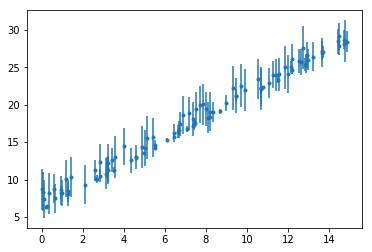

In [2]:
x_dat,y_dat,err_dat=np.loadtxt('datos.txt',unpack=True).T
plt.errorbar(x_dat, y_dat, err_dat, fmt='.')

In [17]:
a_st=2.
b_st=8.
sig_a=0.09
sig_b=0.09


Nsamples=10000

In [18]:
#Definimos una función que nos arroje un número random normal 

def random(center, desviation):
    return np.random.normal(center,desviation)

# Función a ajustar
def f(x,a,b):
    return a*x+b

# Definimos el ln de los prior
def lnprior(a,b):
    if ((0.<a<3.) and (0.<b<10.)):
        return 0.
    else:
        return -np.infty
    return


#Definimos el Likelihood
def lnlike(a,b):
    suma=0.0
    evalu=f(x_dat,a,b)
    for i in range (0,len(x_dat)):
        suma+=-0.5*(((evalu[i]-y_dat[i])/err_dat[i]**2)**2)
    return suma

#Definimos la cadena de Markov
def MCMC(a_ini,b_ini,a_prueba, b_prueba):
    p_ini=lnlike(a_ini,b_ini)
    p_prueba=lnlike(a_prueba, b_prueba)
    frac=np.exp(p_prueba)/np.exp(p_ini) #esto porque hasta antes estabamos trabajando con el ln del likelihood, entonces la fracción de p_nuevo/p_ini, será la exponencial de la diferencia
    if (p_prueba>p_ini):
        return a_prueba, b_prueba
    else:
        ran=np.random.uniform()
        if (frac>ran):
            return a_prueba, b_prueba
        else:
            return a_ini,b_ini
    return
    

In [19]:
chains=[]
probs=[]

for i in range(Nsamples):
    a_st=np.random.normal(a_st,sig_a)
    b_st=np.random.normal(b_st,sig_b)
    
    if (lnprior(a_st, b_st)==-np.infty):
        a_st=a_st
        b_st=b_st
    else:
    
        a_prueba=np.random.normal(a_st,sig_a)
        b_prueba=np.random.normal(b_st,sig_b)
        a_nuevo,b_nuevo=MCMC(a_st,b_st,a_prueba, b_prueba)
        a_st=a_nuevo
        b_st=b_nuevo
     
    prob=lnlike(a_st,b_st)
    chains.append((a_st,b_st))       
    probs.append(prob)

a = [a_st for a_st,b_st in chains]
b = [b_st for a_st,b_st in chains]

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [20]:
np.shape(chains)

(10000, 2)

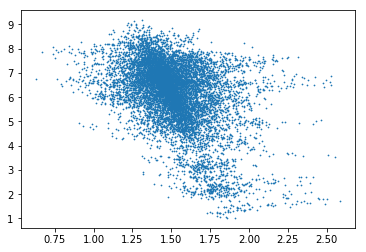

In [21]:
plt.scatter(a, b, s=3, lw = 0)